# DATA EXPLORATION

## Wczytanie pakietów, ustawień i danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  # potrzebne do IterativeImputer
from sklearn.impute import IterativeImputer, KNNImputer

In [2]:
df = pd.read_csv('../data/preprocessed/preprocessed_data.csv')

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_dependency_ratio,835.0,66.218443,8.854913,41.20,60.900000,65.900000,72.000000,1.309000e+02
NO2_avg_conc,1.0,35.000000,NaN,35.00,35.000000,35.000000,35.000000,3.500000e+01
Avg_annual_rent_per_m2,371.0,54.276011,53.804471,4.91,9.075000,39.290000,84.000000,2.568000e+02
Avg_living_area_m2_per_person,606.0,37.385429,10.413019,14.10,29.000000,39.130000,46.000000,5.650000e+01
Avg_apartment_price_per_m2,261.0,2275.468008,1122.187785,333.03,1559.140000,2022.000000,2647.000000,9.074000e+03
Temp_coldest_month,8.0,7.450000,2.712932,4.20,5.725000,6.850000,9.400000,1.220000e+01
Temp_warmest_month,8.0,28.162500,0.921082,27.00,27.425000,28.050000,29.050000,2.930000e+01
Avg_journey_minutes,149.0,24.397651,4.094527,17.50,21.900000,23.700000,26.000000,3.990000e+01
Crude_birth_rate,851.0,9.033173,2.778824,0.01,7.230000,8.980000,10.565000,4.229000e+01
Crude_death_rate,876.0,10.448767,2.948422,0.38,8.540000,10.415000,12.270000,1.961000e+01


## Eksploracja braków danych

In [4]:
# Tworzymy przedziały populacji
bins = [0, 50_000, 100_000, 250_000, 500_000, 1_000_000, np.inf]
labels = ['0-50k', '50-100k', '100-250k', '250-500k', '500-1000k', '1000k+']

df['pop_group'] = pd.cut(df['Population'], bins=bins, labels=labels)

# Grupowanie i liczenie % braków bez kolumny grupującej
missing_matrix = (
    df.groupby('pop_group', observed=True)
      .apply(lambda x: x.drop(columns='pop_group', errors='ignore')  
                    .isna().mean() * 100)
)


C:\Users\wrons\AppData\Local\Temp\ipykernel_16652\2914187182.py:10: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.drop(columns='pop_group', errors='ignore')


In [5]:
result = df[df['pop_group'].isna() | (df['pop_group'] == '')][['City', 'Population', 'pop_group']]
result

,City,Population,pop_group
4,Aalborg,NaN,NaN
7,Adana,NaN,NaN
30,Ankara,NaN,NaN
33,Antalya,NaN,NaN
46,Athina (greater city),NaN,NaN
...,...,...,...
870,Waiblingen (greater city),NaN,NaN
876,Waterford (greater city),NaN,NaN
881,Wien (greater city),NaN,NaN
912,Zonguldak,NaN,NaN


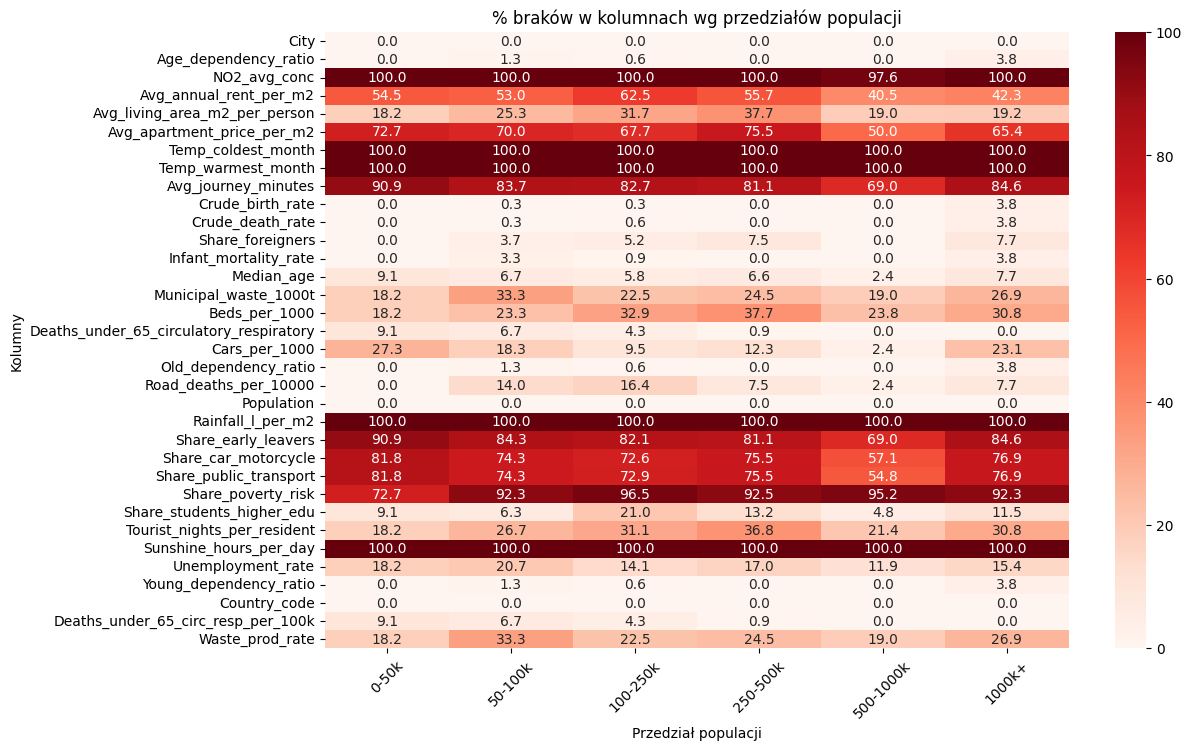

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(missing_matrix.T, annot=True, fmt=".1f", cmap="Reds")  # .T = transpozycja
plt.title("% braków w kolumnach wg przedziałów populacji")
plt.xlabel("Przedział populacji")
plt.ylabel("Kolumny")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Część zmiennych nie nadaje się do dalszej analizy ze względu na całkowity lub niemal całkowity brak danych. Kilka innych, choć potencjalnie istotnych z punktu widzenia analizy warunków życia (m.in. stan transportu publicznego, warunki pogodowe czy jakość powietrza), również musi zostać odrzuconych, ponieważ odsetek braków sięgający 70–80% uniemożliwia przeprowadzenie sensownej imputacji.

In [7]:
threshold = 0.5  # 50%
df = df.loc[:, df.isna().mean() <= threshold]

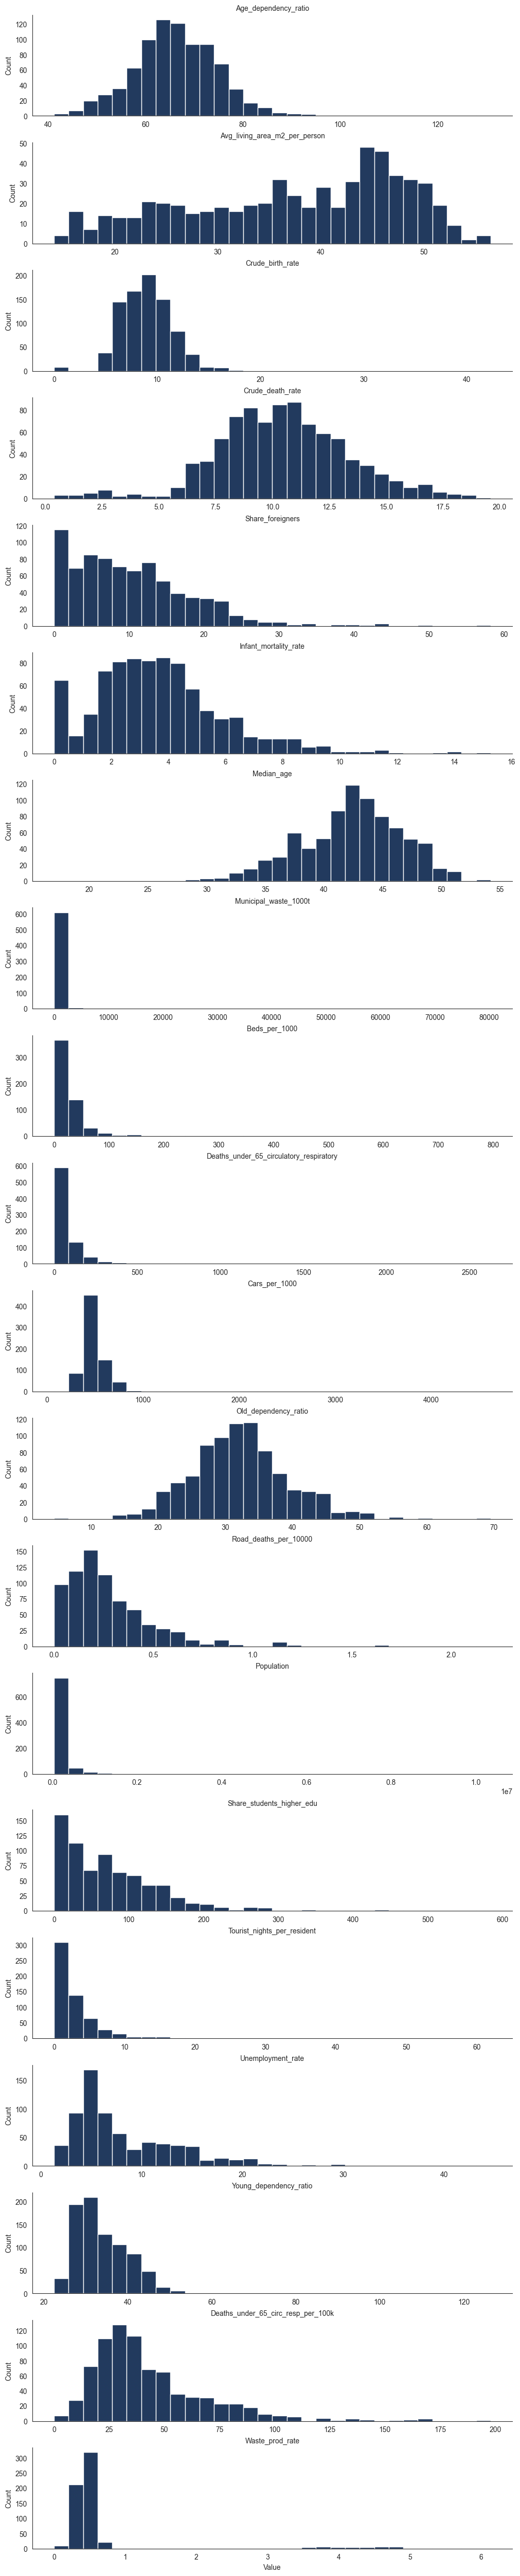

Output(layout=Layout(border_bottom='1px solid lightgray', border_left='1px solid lightgray', border_right='1px…

In [8]:
sns.set_style("white")

# wybór tylko kolumn numerycznych
num_cols = df.select_dtypes(include='number').columns

h_per_plot = 2.5

fig, axes = plt.subplots(
    nrows=len(num_cols),
    ncols=1,
    figsize=(10, h_per_plot * len(num_cols)),
    constrained_layout=True
)

# gdy jest tylko jedna kolumna
if len(num_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, num_cols):
    ax.hist(
        df[col].dropna(),
        bins=30,
        color='#223A5E',
        alpha=1
    )
    ax.set_title(col, fontsize=10)
    ax.set_ylabel("Count")
    sns.despine(ax=ax)

axes[-1].set_xlabel("Value")

out = widgets.Output(
    layout=widgets.Layout(
        height='600px',
        overflow='auto',
        border='1px solid lightgray'
    )
)

with out:
    plt.show()

display(out)

## Ocena przydatności zmiennych do imputacji braków danych

W procesie przygotowania danych dokonano selekcji zmiennych pod kątem możliwości sensownej imputacji braków. Kryterium stanowiły: charakter zmiennej, stabilność rozkładu, interpretowalność wartości oraz możliwość wiarygodnego modelowania braków na podstawie pozostałych obserwacji.

<b>Zmienne nadające się do imputacji</b>

Do imputacji zakwalifikowano przede wszystkim zmienne demograficzne, wskaźniki zdrowia oraz dane z rynku pracy. Są to zmienne o charakterze strukturalnym, relatywnie stabilne w czasie oraz silnie skorelowane zarówno między sobą, jak i z wielkością populacji miasta.

W szczególności obejmuje to:
- zmienne demograficzne (Population, Median_age, Age_dependency_ratio, Young_dependency_ratio, Old_dependency_ratio, Share_foreigners),
- wskaźniki zdrowia (Crude_birth_rate, Crude_death_rate, Infant_mortality_rate, Deaths_under_65_circ_resp_per_100k, Road_deaths_per_10000),
- dane z rynku pracy i struktury społecznej (Unemployment_rate, Share_students_higher_edu).

Rozkłady tych zmiennych cechują się umiarkowaną zmiennością, braki danych nie przekraczają poziomu uniemożliwiającego modelowanie (ok. 10–20%), a wartości skrajne są w większości przypadków interpretowalne. Co istotne, zmienne te opisują fundamentalne cechy populacji miejskich, które można wiarygodnie estymować na podstawie pozostałych informacji (np. wieku populacji, struktury zależności demograficznych czy poziomu rozwoju społeczno-ekonomicznego). Z tego względu imputacja metodami wielowymiarowymi (np. MICE) nie prowadzi do istotnego zniekształcenia struktury danych.

<b>Zmienne nienadające się do imputacji</b>

Pozostałe zmienne zostały wykluczone z imputacji i odrzucone z dalszej analizy. Dotyczy to w szczególności:
- zmiennych opisujących wartości absolutne silnie zależne od skali miasta, takich jak Municipal_waste_1000t czy Deaths_under_65_circulatory_respiratory. Ich rozkłady charakteryzują się bardzo dużą zmiennością oraz ekstremalnymi wartościami maksymalnymi, co wskazuje na silną zależność od wielkości populacji i lokalnych systemów raportowania. Imputacja w takiej postaci prowadziłaby do sztucznego wygładzania danych i utraty informacji o rzeczywistych różnicach między miastami.
- zmiennych infrastrukturalnych i sektorowych (Beds_per_1000, Tourist_nights_per_resident), które wykazują wysoką heterogeniczność wynikającą z odmiennych modeli rozwoju miast. W ich przypadku brak danych często nie jest losowy (np. brak sektora turystycznego), a wartość zero nie jest jednoznaczna z brakiem obserwacji, co uniemożliwia wiarygodną imputację.
- zmiennych związanych z gospodarką odpadami (Waste_prod_rate), które mimo przeliczenia na miary względne nadal wykazują silne zróżnicowanie i znaczną liczbę braków. Różnice w definicjach, metodologii pomiaru oraz systemach raportowania pomiędzy krajami powodują, że imputacja mogłaby wprowadzić więcej szumu niż informacji.

<b>Podsumowanie decyzji</b>

W efekcie do dalszej analizy i imputacji pozostawiono wyłącznie zmienne demograficzne, zdrowotne oraz związane z rynkiem pracy, dla których możliwe jest wiarygodne odtworzenie brakujących wartości. Zmienne infrastrukturalne, sektorowe oraz o silnie zależnej od skali interpretacji zostały odrzucone, aby uniknąć wprowadzania sztucznej struktury i błędnych wniosków w kolejnych etapach analizy.

In [9]:
# Zmienne odrzucone z analizy (brak sensownej imputacji)
cols_to_drop = [
    'Municipal_waste_1000t',
    'Deaths_under_65_circulatory_respiratory',
    'Beds_per_1000',
    'Tourist_nights_per_resident',
    'Waste_prod_rate',
    'pop_group'
]

# Usunięcie kolumn (bez błędu, jeśli którejś nie ma)
df = df.drop(columns=cols_to_drop, errors='ignore')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_dependency_ratio,835.0,66.218443,8.854913,41.20,60.900000,65.900000,72.00000,1.309000e+02
Avg_living_area_m2_per_person,606.0,37.385429,10.413019,14.10,29.000000,39.130000,46.00000,5.650000e+01
Crude_birth_rate,851.0,9.033173,2.778824,0.01,7.230000,8.980000,10.56500,4.229000e+01
Crude_death_rate,876.0,10.448767,2.948422,0.38,8.540000,10.415000,12.27000,1.961000e+01
Share_foreigners,799.0,10.409512,8.191818,0.00,4.100000,9.100000,14.85000,5.820000e+01
Infant_mortality_rate,840.0,3.696149,2.319722,0.00,2.180000,3.475000,4.78250,1.528000e+01
Median_age,828.0,42.316184,4.341769,17.00,39.800000,42.700000,45.10000,5.420000e+01
Cars_per_1000,739.0,495.150338,198.228303,72.06,415.560000,469.260000,534.70000,4.620040e+03
Old_dependency_ratio,835.0,32.204192,7.200577,4.50,27.600000,31.900000,36.15000,6.950000e+01
Road_deaths_per_10000,743.0,0.286110,0.268203,0.00,0.130000,0.220000,0.37000,2.200000e+00


# DATA IMPUTATION

Zmienne uzupełnione średnią:

Infant_mortality_rate – Braków jest bardzo mało (~1%), a zmienna nie wykazuje silnych zależności z innymi cechami. Uzupełnienie średnią jest szybkie i nie zniekształca danych.

Crude_birth_rate – Braki praktycznie zerowe, rozkład umiarkowany; średnia dobrze reprezentuje typową wartość.

Crude_death_rate – Braki praktycznie zerowe, rozkład umiarkowany; średnia jest wystarczająca

Zmienne uzupełnione medianą:

Median_age – Braków niewiele (~1%). Mediana jest odporna na wartości odstające i dobrze zachowuje typowy wiek w mieście.

Zmienne uzupełnione KNN:

Share_foreigners – Niewielka liczba braków (~4%). Wartości zależą od specyfiki miasta i jego otoczenia, więc imputacja oparta na podobnych miastach (KNN) jest naturalna.

Unemployment_rate – Braki ~17%. Stopa bezrobocia jest silnie powiązana z innymi zmiennymi demograficznymi i ekonomicznymi; KNN wykorzystuje podobieństwo między miastami, co pozwala zachować lokalne zależności.

Zmienne uzupełnione MICE:

Avg_living_area_m2_per_person – Braki ~27%. Zależności z innymi cechami demograficznymi (populacja, struktura wiekowa) pozwalają MICE dobrze przewidzieć brakujące wartości.

Road_deaths_per_10000 – Braki ~11%. Zależna od populacji, liczby samochodów i innych czynników miejskich; MICE pozwala modelować te powiązania.

Share_students_higher_edu – Braki ~14%. Silnie powiązana z wiekiem populacji i strukturą miasta; MICE zachowuje te zależności.

Deaths_under_65_circ_resp_per_100k – Braki ~5%. Zależna od innych zmiennych demograficznych i zdrowotnych, MICE jest bardziej precyzyjne niż średnia.

Zmienne uzupełnione MICE z transformacją log:

Cars_per_1000 – Rozkład bardzo skośny (72 → 4620), log-transformacja stabilizuje imputację.

Population – Silnie skośny rozkład (37 tys → 10 mln), log-transformacja pozwala MICE modelować zależności bez nadmiernego wpływu ekstremalnych wartości.

Share_students_higher_edu – Rozkład bardzo szeroki (0 → 583), log pozwala uniknąć „rozciągnięcia” imputacji przy dużych wartościach.

Road_deaths_per_10000 – Rozkład skośny z wieloma wartościami blisko zera, log1p może poprawić imputację braków przy MICE.

In [11]:
# Lista zmiennych według metody imputacji
mean_vars = ["Infant_mortality_rate", "Crude_birth_rate", "Crude_death_rate"]
median_vars = ["Median_age"]
knn_vars = ["Share_foreigners", "Unemployment_rate"]
mice_log_vars = ["Cars_per_1000", "Population", "Share_students_higher_edu", "Road_deaths_per_10000"]
mice_vars = ["Age_dependency_ratio", "Old_dependency_ratio", "Young_dependency_ratio",
             "Avg_living_area_m2_per_person", "Deaths_under_65_circ_resp_per_100k"]

In [12]:
# Log-transformacja dla wybranych zmiennych
df_log = df.copy()
for col in mice_log_vars:
    df_log[col] = np.log1p(df_log[col])  # log1p obsłuży zera

In [15]:
# Imputacja średnią
if mean_vars:
    mean_imputer = SimpleImputer(strategy="mean")
    df[mean_vars] = mean_imputer.fit_transform(df[mean_vars])

# Imputacja medianą
if median_vars:
    median_imputer = SimpleImputer(strategy="median")
    df[median_vars] = median_imputer.fit_transform(df[median_vars])

# Imputacja KNN
if knn_vars:
    scaler_knn = StandardScaler()
    knn_scaled = scaler_knn.fit_transform(df[knn_vars])
    knn_imputer = KNNImputer(n_neighbors=5)
    knn_imputed = knn_imputer.fit_transform(knn_scaled)
    df[knn_vars] = scaler_knn.inverse_transform(knn_imputed)

# Imputacja MICE (IterativeImputer)
all_mice_vars = mice_vars + mice_log_vars
scaler_mice = StandardScaler()
mice_scaled = scaler_mice.fit_transform(df_log[all_mice_vars])
mice_imputer = IterativeImputer(random_state=42, max_iter=20)
mice_imputed = mice_imputer.fit_transform(mice_scaled)

In [ ]:
# wracamy do oryginalnej skali
df_log[all_mice_vars] = scaler_mice.inverse_transform(mice_imputed)

# Cofnięcie log-transformacji
for col in mice_log_vars:
    df[col] = np.expm1(df_log[col])  # odwrotność log1p

# Kopiowanie zmiennych MICE do finalnego df
for col in mice_vars:
    df[col] = df_log[col]

In [14]:
# Sprawdzenie braków
print("Braki po imputacji:")
print(df.isna().sum())

Braki po imputacji:
City                                  0
Age_dependency_ratio                  0
Avg_living_area_m2_per_person         0
Crude_birth_rate                      0
Crude_death_rate                      0
Share_foreigners                      0
Infant_mortality_rate                 0
Median_age                            0
Cars_per_1000                         0
Old_dependency_ratio                  0
Road_deaths_per_10000                 0
Population                            0
Share_students_higher_edu             0
Unemployment_rate                     0
Young_dependency_ratio                0
Country_code                          0
Deaths_under_65_circ_resp_per_100k    0
dtype: int64


In [16]:
df

,City,Age_dependency_ratio,Avg_living_area_m2_per_person,Crude_birth_rate,Crude_death_rate,Share_foreigners,Infant_mortality_rate,Median_age,Cars_per_1000,Old_dependency_ratio,Road_deaths_per_10000,Population,Share_students_higher_edu,Unemployment_rate,Young_dependency_ratio,Country_code,Deaths_under_65_circ_resp_per_100k
0,'s-Gravenhage (greater city),61.1,49.30000,9.64,8.38,19.400000,3.06,37.0,367.250000,26.0,0.170000,813669.000000,64.800000,5.270000,35.2,NL,21.138817
1,'s-Hertogenbosch,63.8,38.70971,9.88,9.45,6.500000,1.89,40.0,546.450000,29.8,0.130000,160757.000000,37.100000,2.530000,34.0,NL,28.614617
2,A Coruña (greater city),67.9,37.12000,5.57,10.58,7.600000,4.35,48.3,427.690000,40.9,0.120000,247350.000000,98.300000,10.450000,27.0,ES,27.895694
3,Aachen,54.1,46.50000,8.18,10.20,22.300000,2.91,37.0,381.900000,28.1,0.120000,252136.000000,229.600000,5.630000,25.5,DE,39.661135
4,Aalborg,63.5,48.70000,11.86,10.62,10.409512,2.61,39.7,424.389117,27.6,0.183559,188336.313756,75.851431,8.321792,36.0,DK,18.042179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,České Budějovice,68.4,23.65000,10.45,12.27,3.000000,5.12,43.4,611.043306,35.5,1.170000,93426.000000,142.000000,5.232000,32.9,CZ,50.307195
922,Łomża,55.5,25.00000,8.14,11.53,0.200000,4.07,40.8,523.170000,24.7,0.170000,60468.000000,44.000000,6.684000,30.9,PL,33.075346
923,Łódź,65.2,28.50000,8.17,18.18,0.200000,3.13,44.9,644.850000,38.1,0.230000,664860.000000,68.100000,6.684000,27.1,PL,81.520922
924,Šiauliai,62.8,25.20000,5.57,11.36,11.500000,3.25,43.0,420.650000,31.8,0.270000,110331.000000,28.900000,6.230000,31.0,LT,63.445451


# DATA STANDARIZATION

In [17]:
num_vars = [
    'Age_dependency_ratio', 'Avg_living_area_m2_per_person', 'Crude_birth_rate',
    'Crude_death_rate', 'Share_foreigners', 'Infant_mortality_rate',
    'Median_age', 'Cars_per_1000', 'Old_dependency_ratio', 'Road_deaths_per_10000',
    'Population', 'Share_students_higher_edu', 'Unemployment_rate',
    'Young_dependency_ratio', 'Deaths_under_65_circ_resp_per_100k'
]

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_vars] = scaler.fit_transform(df[num_vars])

In [19]:
df_scaled.to_csv('../data/processed/processed_data.csv', index=False)